# Beta Densities with Integer Parameters

In [ ]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from sympy import *
init_printing()
import warnings
warnings.filterwarnings("ignore")

In the previous section we learned how to work with joint densities, but many of the joint density functions seemed to appear out of nowhere. For example, we checked that the function

$$
f(x, y) = 120x(y-x)(1-y), ~~~~ 0 < x < y < 1
$$

is a joint density, but there was no clue where it came from. In this section we will find its origin and go on to develop an important family of densities on the unit interval.

## Order Statistics of IID Uniform $(0, 1)$ Variables
Let $U_1, U_2, \ldots, U_n$ be i.i.d. uniform on $(0, 1)$. Imagine each $U_i$ as the position of a dart thrown at the unit interval. The graph below shows the positions of five such darts, each shown as a star.

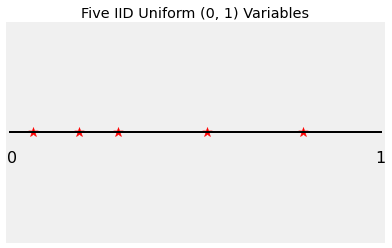

In [3]:
# NO CODE
np.random.seed(17) #make plot deterministic 


plt.plot([0, 1], [0, 0], color='k', lw=2)
y = 1 - np.ones(5)
x = stats.uniform.rvs(size=5)
order_stats = np.sort(x)
plt.scatter(x, y, marker='*', color='r', s=100)
plt.text(0, -0.015, r'0', size=16)
plt.text(0.98, -0.015, r'1', size=16)
plt.xlim(0, 1)
plt.yticks([])
plt.xticks([])
plt.title('Five IID Uniform (0, 1) Variables');

Based on the graph above, can you tell which star corresponds to $U_1$? You can't, because $U_1$ could be any of the five stars. So also you can't identify any of the five variables $U_1, U_2, U_3, U_4, U_5$. 

What you *can* see, however, is the list of $U_i$'s *sorted in increasing order*. You can see the value of the minimum, the second on the sorted list, the third, the fourth, and finally the fifth which is the maximum.

These are called the *order statistics* of $U_1, U_2, U_3, U_4, U_5$, and are denoted $U_{(1)}, U_{(2)}, U_{(3)}, U_{(4)}, U_{(5)}$.

Remember that because the $U_i$'s are independent random variables with densities, there can't be ties: the chance that two of them are equal is 0.

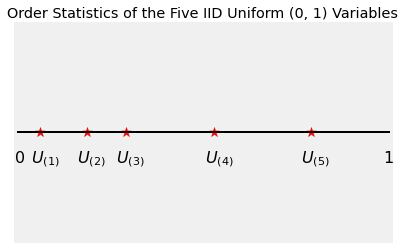

In [7]:
# NO CODE

plt.plot([0, 1], [0, 0], color='k', lw=2)
order_stats = np.sort(x)
plt.scatter(x, y, marker='*', color='r', s=100)
u_labels = make_array('$U_{(1)}$', '$U_{(2)}$', '$U_{(3)}$', '$U_{(4)}$', '$U_{(5)}$')
for i in range(5):
    plt.text(order_stats[i] - 0.025, -0.015, u_labels[i], size=16)
plt.text(0, -0.015, r'0', size=16)
plt.text(0.98, -0.015, r'1', size=16)
plt.xlim(0, 1)
plt.yticks([])
plt.xticks([])
plt.title('Order Statistics of the Five IID Uniform (0, 1) Variables');

In general for $1 \le k \le n$, the *$k$th order statistic* of $U_1, U_2, \ldots, U_n$ is the $k$th value when the $U_i$'s are sorted in increasing order. This can also be thought of as the $k$th *ranked* value when the minimum has rank 1. It is denoted $U_{(k)}$.

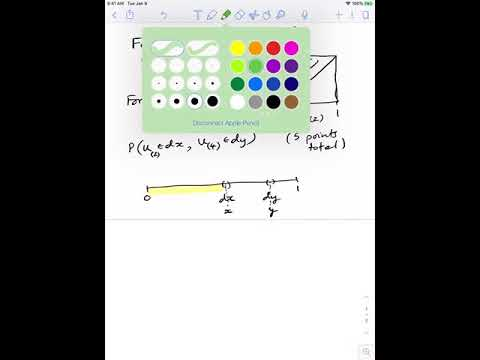

In [ ]:
#| label: vid-joint-os
#| echo: false
from IPython.display import YouTubeVideo
YouTubeVideo('3AIyXF1kQPA')

```{dropdown}  🎥 See More
![](#vid-joint-os)
```

## Joint Density of Two Order Statistics
Let $n = 5$ as above and let's try to work out the joint density of $U_{(2)}$ and $U_{(4)}$. That's the joint density of the second and fourth values on the sorted list.

The graph below shows the event $\{U_{(2)} \in dx, U_{(4)} \in dy\}$ for values $x$ and $y$ such that $0 < x < y < 1$.

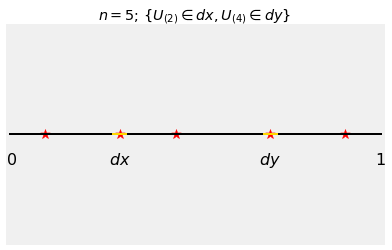

In [10]:
# NO CODE

plt.plot([0, 1], [0, 0], color='k', lw=2)
y = 1 - np.ones(5)
x = make_array(0.1, 0.3, 0.45, 0.7, 0.9)
plt.scatter(x, y, marker='*', color='r', s=100)
plt.plot([0.28, 0.32], [0, 0], color='gold', lw=2)
plt.text(0.27, -0.015, r'$dx$', size=16)
plt.plot([0.68, 0.72], [0, 0], color='gold', lw=2)
plt.text(0.67, -0.015, r'$dy$', size=16)
plt.text(0, -0.015, r'0', size=16)
plt.text(0.98, -0.015, r'1', size=16)
plt.xlim(0, 1)
plt.yticks([])
plt.xticks([])
plt.title('$n = 5$; $\{ U_{(2)} \in dx, U_{(4)} \in dy \}$');

To find $P(U_{(2)} \in dx, U_{(4)} \in dy)$, notice that for this event to occur:

- one of $U_1, U_2, U_3, U_4, U_5$ must be in $(0, x)$
- one must be in $dx$
- one must be in $(x, y)$
- one must be in $dy$
- one must be in $(y, 1)$

You can think of each of the five independent uniform $(0, 1)$ variables as a multinomial trial. It can land in any of the five intervals above, independently of the others and with the same chance as the others. 

The chances are given by

$$
\begin{align*}
&P(U \in (0, x)) = x, ~~ P(U \in dx) \sim 1dx, ~~ P(U \in (x, y)) = (y-x)\\
&P(U \in dy) \sim 1dy, ~~ P(U \in (y, 1)) = 1-y
\end{align*}
$$

where $U$ is any uniform $(0, 1)$ random variable.

Apply the multinomial formula to get

$$
\begin{align*}
P(U_{(2)} \in dx, U_{(4)} \in dy) ~ &\sim ~ 
\frac{5!}{1!1!1!1!1!} x^1 (1dx)^1 (y-x)^1 (1dy)^1 (1-y)^1 \\
&\sim ~ 120x(y-x)(1-y)dxdy
\end{align*}
$$

and therefore the joint density of $U_{(2)}$ and $U_{(4)}$ is given by

$$
f(x, y) = 120x(y-x)(1-y), ~~~ 0 < x < y < 1
$$

This solves the mystery of how the formula arises. 

But it also does much more. The *marginal* densities of the order statistics of i.i.d. uniform $(0, 1)$ variables form a family that is important in data science.

```{admonition} Quick Check
$U_1, U_2, \ldots, U_{10}$ are i.i.d. uniform $(0, 1)$ random variables. Find the joint density of $U_{(3)}$ and $U_{(7)}$. You can leave the constant in terms of factorials.

```

```{admonition} Answer
:class: dropdown
$f(x,y) = \frac{10!}{2!1!3!1!3!}x^2(y-x)^3(1-y)^3$, $0 < x < y < 1$

```

## The Density of $U_{(k)}$
Let $U_{(k)}$ be the $k$th order statistic of $U_1, U_2, \ldots, U_n$. We will find the density of $U_{(k)}$ by following the same general process that we followed to find the joint density above.

The graph below displays the event $\{ U_{(k)} \in dx \}$. For the event to occur,
- One of the variables $U_1, U_2, \ldots, U_n$ has to be in $dx$.
- Of the remaining $n-1$ variables, $k-1$ must have values in $(0, x)$ and the rest in $(x, 1)$.

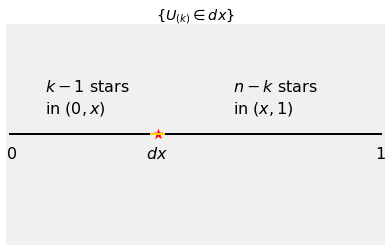

In [11]:
# NO CODE

plt.plot([0, 1], [0, 0], color='k', lw=2)
plt.scatter(0.4, 0, marker='*', color='r', s=100)
plt.plot([0.38, 0.42], [0, 0], color='gold', lw=2)
plt.text(0.37, -0.012, r'$dx$', size=16)
plt.text(0.1, 0.022, '$k-1$ stars', size=16)
plt.text(0.1, 0.011, 'in $(0, x)$', size=16)
plt.text(0.6, 0.022, '$n-k$ stars', size=16)
plt.text(0.6, 0.011, 'in $(x, 1)$', size=16)
plt.text(0, -0.012, r'0', size=16)
plt.text(0.98, -0.012, r'1', size=16)
plt.xlim(0, 1)
plt.yticks([])
plt.xticks([])
plt.title('$\{ U_{(k)} \in dx \}$');

Apply the multinomial formula again.

$$
P(U_{(k)} \in dx) ~ \sim ~
\frac{n!}{(k-1)! 1! (n-k)!} x^{k-1} (1dx)^1 (1-x)^{n-k}
$$

Therefore the density of $U_{(k)}$ is given by

$$
f_{U_{(k)}} (x) = \frac{n!}{(k-1)!(n-k)!} x^{k-1}(1-x)^{n-k}, ~~~ 0 < x < 1
$$

For consistency, let's rewrite the exponents slightly so that each ends with $-1$:

$$
f_{U_{(k)}} (x) = \frac{n!}{(k-1)!((n-k+1)-1)!} x^{k-1}(1-x)^{(n-k+1)-1}, ~~~ 0 < x < 1
$$

Because $1 \le k \le n$, we know that $n-k+1$ is a positive integer. Since $n$ is an arbitrary positive integer, so is $n-k+1$.

## Beta Densities
We have shown that if $r$ and $s$ are any two positive integers, then the function

$$
f(x) ~ = ~ \frac{(r+s-1)!}{(r-1)!(s-1)!} x^{r-1}(1-x)^{s-1}, ~~~ 0 < x < 1
$$

is a probability density function. This is called the *beta density with parameters $r$ and $s$*.

By the derivation above, **the $k$th order statistic $U_{(k)}$ of $n$ i.i.d. uniform $(0, 1)$ random variables has the beta density with parameters $k$ and $n-k+1$.**

The shape of the density is determined by the two factors that involve $x$. All the factorials are just parts of the constant that make the density integrate to 1.

Notice that the uniform $(0, 1)$ density is the same as the beta density with parameters $r = 1$ and $s = 1$. The uniform $(0, 1)$ density is a member of the *beta family*.

The graph below shows some beta density curves. As you would expect, the beta $(3, 3)$ density is symmetric about 0.5. 

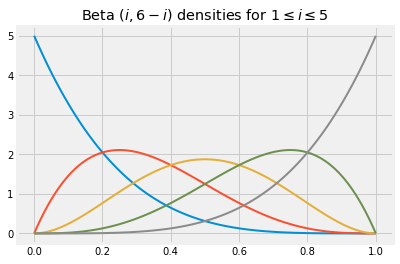

In [7]:
x = np.arange(0, 1.01, 0.01)
for i in np.arange(1, 7, 1):
    plt.plot(x, stats.beta.pdf(x, i, 6-i), lw=2)
plt.title('Beta $(i, 6-i)$ densities for $1 \leq i \leq 5$');

By choosing the parameters appropriately, you can create beta densities that put much of their mass near a prescribed value. That is one of the reasons beta densities are used to model *random proportions*. For example, if you think that the probability that an email is spam is most likely in the 60% to 90% range, but might be lower, you might model your belief by choosing the density that peaks at around 0.75 in the graph above.

The calculation below shows you how to get started on the process of picking parameters so that the beta density with those parameters has properties that reflect your beliefs.

## The Beta Integral
The beta density integrates to 1, and hence for all positive integers $r$ and $s$ we have

$$
\int_0^1 x^{r-1}(1-x)^{s-1}dx ~ = ~ \frac{(r-1)!(s-1)!}{(r+s-1)!}
$$

Thus probability theory makes short work of an otherwise laborious integral. Also, we can now find the expectation of a random variable with a beta density.

Let $X$ have the beta $(r, s)$ density for two positive integer parameters $r$ and $s$. Then

$$
\begin{align*}
E(X) &= \int_0^1 x \frac{(r+s-1)!}{(r-1)!(s-1)!} x^{r-1}(1-x)^{s-1}dx \\ \\
&= \frac{(r+s-1)!}{(r-1)!(s-1)!} \int_0^1 x^r(1-x)^{s-1}dx \\ \\
&= \frac{(r+s-1)!}{(r-1)!(s-1)!} \cdot \frac{r!(s-1)!}{(r+s)!} ~~~~~~~ \text{(beta integral for parameters } r+1 \text{ and } s\text{)}\\ \\
&= \frac{r}{r+s}
\end{align*}
$$

You can follow the same method to find $E(X^2)$ and hence $Var(X)$.

The formula for the expectation allows you to pick parameters corresponding to your belief about the random proportion being modeled by $X$. For example, if you think the proportion is likely to be somewhere around 0.4, you might start by trying out a beta prior with $r = 2$ and $s = 3$.

You will have noticed that the form of the beta density looks rather like the binomial formula. Indeed, we used the binomial formula to derive the beta density. Later in the course you will see another close relation between the beta and the binomial. These properties make the beta family one of the most widely used families of densities in machine learning.